<a href="https://colab.research.google.com/github/camilaisajar-design/LABORATORIOXIII/blob/main/Laboratorio_15practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio - Sesion 15


MUESTRA DEL DATASET :CON 50 IMAGENES

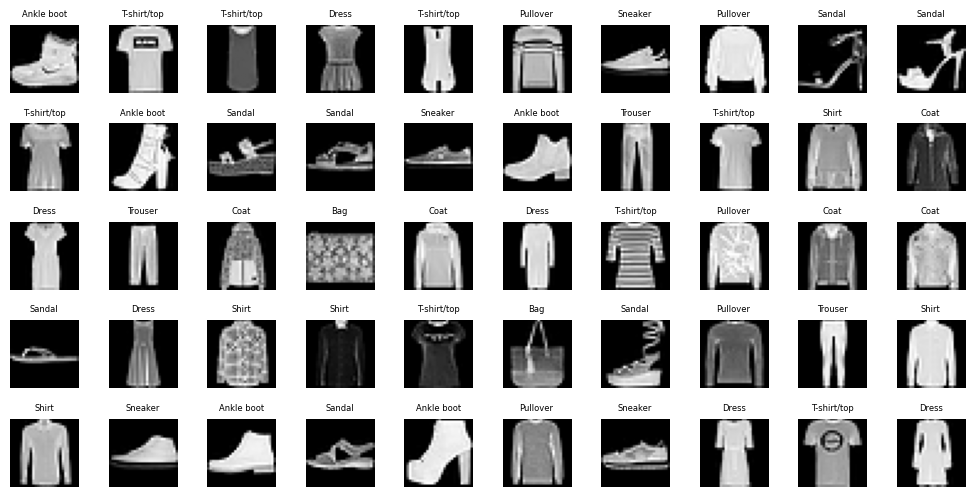

In [4]:
import matplotlib.pyplot as plt

# Lista de nombres de las clases en Fashion MNIST
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_imgs = 50  # cantidad de imágenes que quieres mostrar
plt.figure(figsize=(10,10))

for i in range(num_imgs):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train_raw[i], cmap='gray')
    plt.axis('off')
    # título con el nombre de la categoría
    plt.title(labels[y_train[i]], fontsize=6)

plt.tight_layout()
plt.show()

In [5]:
from keras.datasets import fashion_mnist
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()


## Paso 1. Importación de Bibliotecas
* Importa las bibliotecas necesarias. Las más importantes para este taller son pandas para la manipulación de datos, numpy para realizar operaciones numéricas y scikit-learn para implementar el modelo KNN.

In [6]:
# Importar las bibliotecas necesarias

# Librerías básicas para manejo de datos y operaciones numéricas
import numpy as np
import pandas as pd

# Librería para dividir los datos y evaluar el modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importar el modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# Importar el dataset Fashion MNIST desde Keras
from keras.datasets import fashion_mnist

# Cargar los datos
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()

# Verificar las dimensiones de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", X_train_raw.shape)
print("Tamaño del conjunto de prueba:", X_test_raw.shape)


Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


## Paso 2. Cargar los Datos
* Carga un conjunto de datos que contiene las características y las etiquetas (clases) que quieres predecir. En este taller, el conjunto de datos será almacenado usando pandas, que permite manejar la información de forma tabular.

* Carga los datos usando pandas y asegúrate de que las características (features) y las etiquetas (targets) estén correctamente identificadas. Recuerda que estos datos se dividirán más adelante para entrenar y probar el modelo.

In [7]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()

# Aplanar las imágenes (convertir 28x28 -> 784 columnas)
X_train = X_train_raw.reshape((X_train_raw.shape[0], -1))
X_test = X_test_raw.reshape((X_test_raw.shape[0], -1))

# Normalizar los valores de píxel (de 0–255 a 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Crear DataFrames de pandas
df_train = pd.DataFrame(X_train)
df_train['label'] = y_train

df_test = pd.DataFrame(X_test)
df_test['label'] = y_test

# Mostrar las primeras filas del conjunto de entrenamiento
print("Conjunto de entrenamiento:")
print(df_train.head())

# Mostrar la forma del DataFrame
print("\nDimensiones del DataFrame de entrenamiento:", df_train.shape)


Conjunto de entrenamiento:
     0    1    2    3    4         5    6    7         8         9  ...  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   
1  0.0  0.0  0.0  0.0  0.0  0.003922  0.0  0.0  0.000000  0.000000  ...   
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.086275  ...   
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.129412  0.376471  ...   
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   

        775       776       777  778  779  780  781  782  783  label  
0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      9  
1  0.447059  0.509804  0.298039  0.0  0.0  0.0  0.0  0.0  0.0      0  
2  0.000000  0.003922  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      0  
3  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      3  
4  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      0  

[5 rows x 785 columns]

Dimensiones del DataFrame de entrenamiento: (60000, 785)


## Paso 3. División de los Datos en Entrenamiento y Prueba
* Para evaluar el rendimiento del modelo de manera confiable, es necesario dividir el conjunto de datos en dos partes: una parte para entrenar el modelo y otra parte para probar su rendimiento. De esta forma, podemos medir si el modelo está generalizando correctamente a datos que no ha visto antes.

In [8]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split

# Separar las características (X) y las etiquetas (y)
X = df_train.drop('label', axis=1)
y = df_train['label']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mostrar las dimensiones de cada conjunto
print("Conjunto de entrenamiento:", X_train_split.shape, y_train_split.shape)
print("Conjunto de prueba:", X_test_split.shape, y_test_split.shape)


Conjunto de entrenamiento: (48000, 784) (48000,)
Conjunto de prueba: (12000, 784) (12000,)


## Paso 4. Escalado de los Datos
* El algoritmo KNN calcula la distancia entre las instancias para hacer predicciones, por lo que es fundamental que todas las características tengan una escala similar. Si una característica tiene valores mucho más grandes que otras, podría dominar el cálculo de la distancia. Por eso, es necesario escalar o normalizar los datos.

* Aplica una técnica de escalado (como la normalización o estandarización) a tus características. Reflexiona sobre cómo la escala de los datos puede influir en los resultados del modelo.

In [9]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train_split)
X_test_scaled = scaler.transform(X_test_split)

# Mostrar información sobre los datos escalados
print("Datos originales (primeras 5 características):")
print(X_train_split.iloc[0, :5])

print("\nDatos escalados (primeras 5 características):")
print(X_train_scaled[0, :5])


Datos originales (primeras 5 características):
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 48572, dtype: float64

Datos escalados (primeras 5 características):
[-0.0082731  -0.02778131 -0.04816694 -0.04066609 -0.05683638]


## Paso 5. Entrenamiento del Modelo KNN
* Ahora que los datos están preparados, es momento de crear el clasificador KNN. El parámetro clave aquí es K, que indica el número de vecinos cercanos que el algoritmo considerará al hacer una predicción. Un valor de K bajo puede hacer que el modelo sea muy sensible a los datos de entrenamiento, mientras que un valor alto puede hacer que el modelo sea más generalizado.

* Elige un valor de K (por ejemplo, 3 o 5) e inicializa el modelo KNN. Entrena el modelo con el conjunto de entrenamiento y asegúrate de que el proceso de ajuste se complete correctamente.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Definir el número de vecinos (K)
k = 5

# Inicializar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo con los datos escalados
print("Entrenando el modelo KNN con K =", k, "...")
knn.fit(X_train_scaled, y_train_split)

print("Entrenamiento completado correctamente ✅")


Entrenando el modelo KNN con K = 5 ...
Entrenamiento completado correctamente ✅


## Paso 6. Realización de Predicciones
* Una vez que el modelo esté entrenado, puedes usarlo para hacer predicciones sobre el conjunto de prueba o sobre nuevos datos. El modelo buscará los K vecinos más cercanos a cada instancia y decidirá la clase basándose en la mayoría de votos entre estos vecinos.

* Usa tu modelo KNN para predecir las etiquetas de las instancias en el conjunto de prueba. Anota las predicciones y compáralas con las etiquetas reales.

In [11]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Mostrar las primeras predicciones y sus etiquetas reales
print("Predicciones del modelo:", y_pred[:10])
print("Etiquetas reales:", y_test_split.values[:10])


Predicciones del modelo: [8 8 7 4 8 4 1 0 4 5]
Etiquetas reales: [8 8 7 4 8 4 1 0 4 5]


## Paso 7. Evaluación del Rendimiento del Modelo
* Después de hacer las predicciones, es crucial evaluar el rendimiento del modelo. La métrica más común es la precisión (accuracy), que mide el porcentaje de predicciones correctas. También puedes usar otras métricas como la matriz de confusión para entender mejor los errores del modelo.

* Calcula la precisión del modelo y genera una matriz de confusión. Reflexiona sobre qué tan bien ha funcionado el modelo en el conjunto de prueba y si hay algún patrón en los errores de clasificación.

Precisión del modelo KNN: 0.8530


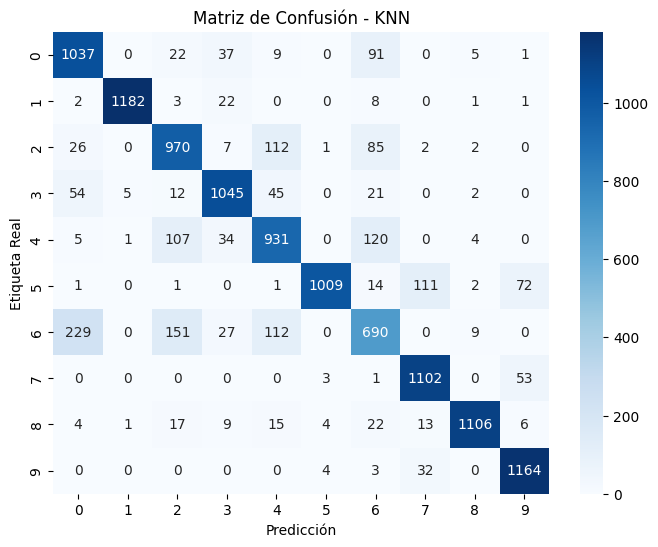


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1202
           1       0.99      0.97      0.98      1219
           2       0.76      0.80      0.78      1205
           3       0.88      0.88      0.88      1184
           4       0.76      0.77      0.77      1202
           5       0.99      0.83      0.90      1211
           6       0.65      0.57      0.61      1218
           7       0.87      0.95      0.91      1159
           8       0.98      0.92      0.95      1197
           9       0.90      0.97      0.93      1203

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_split, y_pred)
print(f"Precisión del modelo KNN: {accuracy:.4f}")

# Generar la matriz de confusión
cm = confusion_matrix(y_test_split, y_pred)

# Mostrar la matriz de confusión visualmente
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

# Reporte de clasificación (opcional, pero útil)
print("\nReporte de Clasificación:")
print(classification_report(y_test_split, y_pred))


## Paso 8. Exploración de los Vecinos Cercanos
* Un aspecto interesante del KNN es que puedes explorar quiénes son los vecinos más cercanos que el modelo utilizó para hacer una predicción. Esto te permite comprender mejor por qué el modelo clasificó una instancia de una manera particular.

* Elige una instancia específica de prueba y analiza quiénes fueron sus vecinos más cercanos. Reflexiona sobre cómo los vecinos influenciaron la decisión del modelo.

Etiqueta real: 3
Predicción del modelo: 6
Índices de los vecinos más cercanos: [[ 6100 46708  3171 47948 31681]]
Distancias a los vecinos: [[18.12824118 18.38486935 18.54109513 18.59298975 18.82639175]]


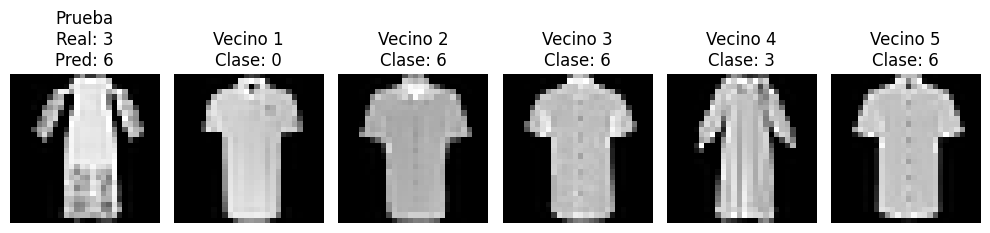

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Elegir una instancia de prueba (puedes cambiar el índice para explorar otras)
index = 10

# Obtener la imagen y su etiqueta real
imagen_prueba = X_test_split.iloc[index].values.reshape(28, 28)
etiqueta_real = y_test_split.iloc[index]

# Obtener los índices y distancias de los K vecinos más cercanos
distancias, indices_vecinos = knn.kneighbors([X_test_scaled[index]])

# Mostrar información
print(f"Etiqueta real: {etiqueta_real}")
print(f"Predicción del modelo: {y_pred[index]}")
print(f"Índices de los vecinos más cercanos: {indices_vecinos}")
print(f"Distancias a los vecinos: {distancias}")

# Visualizar la imagen de prueba y sus vecinos más cercanos
plt.figure(figsize=(10, 3))

# Imagen de prueba
plt.subplot(1, k + 1, 1)
plt.imshow(imagen_prueba, cmap='gray')
plt.title(f"Prueba\nReal: {etiqueta_real}\nPred: {y_pred[index]}")
plt.axis('off')

# Mostrar los K vecinos más cercanos
for i, vecino_idx in enumerate(indices_vecinos[0]):
    vecino_img = X_train_split.iloc[vecino_idx].values.reshape(28, 28)
    vecino_label = y_train_split.iloc[vecino_idx]
    plt.subplot(1, k + 1, i + 2)
    plt.imshow(vecino_img, cmap='gray')
    plt.title(f"Vecino {i+1}\nClase: {vecino_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
